## Why Seaborn
- Provides a layer of abstraction hence simpler to use
- Better aesthetics
- More graphs included
- Famous

### Seaborn Roadmap
Types of Functions
- Figure Level
- Axis Level

Main Classification
- Relational Plot
- Distribution Plot
- Categorical Plot
- Regression Plot
- Matrix Plot
- Multiplots

https://seaborn.pydata.org/api.html

## 1. Relational Plot
- to see the statistical relation between 2 or more variables
- Bivariate Analysis

Plots under this section
- Scatter Plot
- Line Plot

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

In [2]:
tips = sns.load_dataset('tips')
print(tips.shape)
tips.head()

(244, 7)


,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


<Axes: xlabel='total_bill', ylabel='tip'>

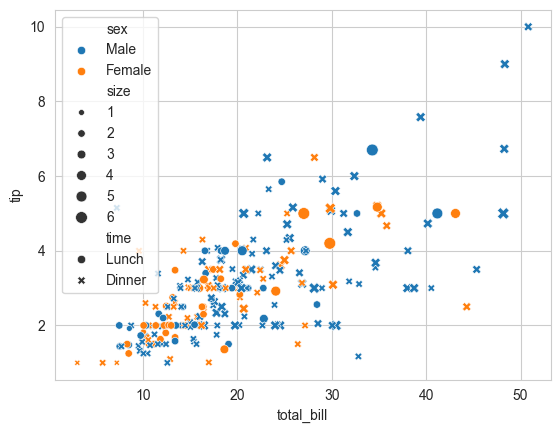

In [3]:
# scatter plot -> axes level function -> rectangle shape
sns.scatterplot(tips, x='total_bill', y='tip', hue='sex', style='time', size='size')

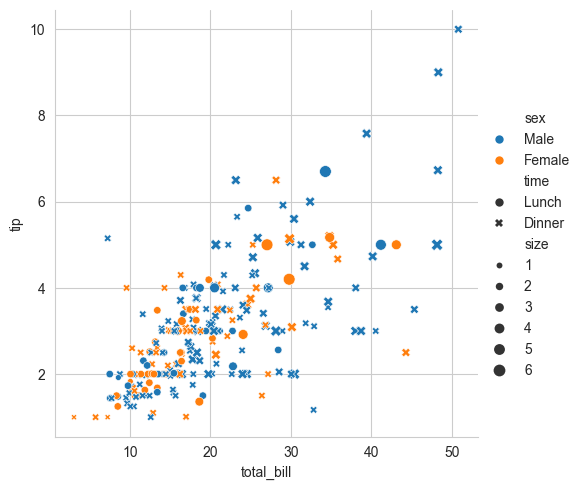

In [4]:
# scatter using relplot -> size and hue
# relplot -> figure level -> square shape
sns.relplot(tips, x='total_bill', y='tip', kind='scatter', hue='sex', style='time', size='size')

In [5]:
# line plot
gap = px.data.gapminder()
print(gap.shape)
gap.head()

(1704, 8)


,country,continent,year,lifeExp,pop,gdpPercap,iso_alpha,iso_num
0,Afghanistan,Asia,1952,28.801,8425333,779.445314,AFG,4
1,Afghanistan,Asia,1957,30.332,9240934,820.853030,AFG,4
2,Afghanistan,Asia,1962,31.997,10267083,853.100710,AFG,4
3,Afghanistan,Asia,1967,34.020,11537966,836.197138,AFG,4
4,Afghanistan,Asia,1972,36.088,13079460,739.981106,AFG,4


In [6]:
india_df = gap.query('country == "India"')
india_df

,country,continent,year,lifeExp,pop,gdpPercap,iso_alpha,iso_num
696,India,Asia,1952,37.373,372000000,546.565749,IND,356
697,India,Asia,1957,40.249,409000000,590.061996,IND,356
698,India,Asia,1962,43.605,454000000,658.347151,IND,356
699,India,Asia,1967,47.193,506000000,700.770611,IND,356
700,India,Asia,1972,50.651,567000000,724.032527,IND,356
701,India,Asia,1977,54.208,634000000,813.337323,IND,356
702,India,Asia,1982,56.596,708000000,855.723538,IND,356
703,India,Asia,1987,58.553,788000000,976.512676,IND,356
704,India,Asia,1992,60.223,872000000,1164.406809,IND,356
705,India,Asia,1997,61.765,959000000,1458.817442,IND,356


<Axes: xlabel='year', ylabel='lifeExp'>

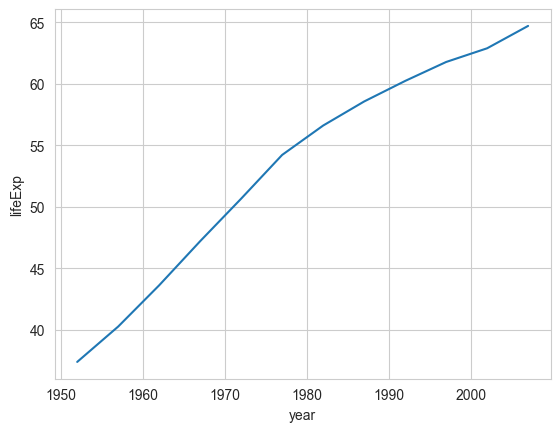

In [7]:
# axes level function
sns.lineplot(india_df, x='year', y='lifeExp')

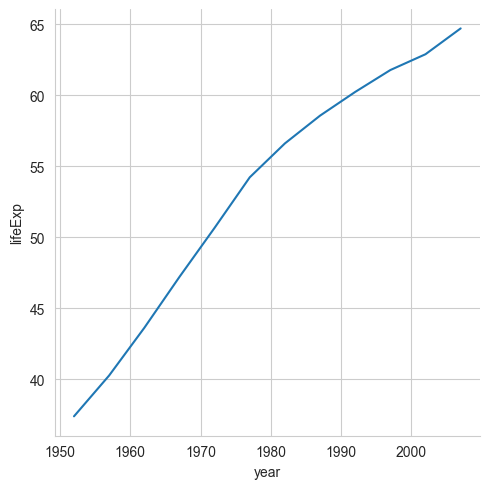

In [8]:
# figure level function
sns.relplot(india_df, x='year', y='lifeExp', kind='line')

In [9]:
# hue -> style
countries = ['India', 'Brazil', 'Germany', 'China', 'Australia']
temp_df = gap.query('country in @countries')
temp_df.head()

,country,continent,year,lifeExp,pop,gdpPercap,iso_alpha,iso_num
60,Australia,Oceania,1952,69.12,8691212,10039.59564,AUS,36
61,Australia,Oceania,1957,70.33,9712569,10949.64959,AUS,36
62,Australia,Oceania,1962,70.93,10794968,12217.22686,AUS,36
63,Australia,Oceania,1967,71.10,11872264,14526.12465,AUS,36
64,Australia,Oceania,1972,71.93,13177000,16788.62948,AUS,36


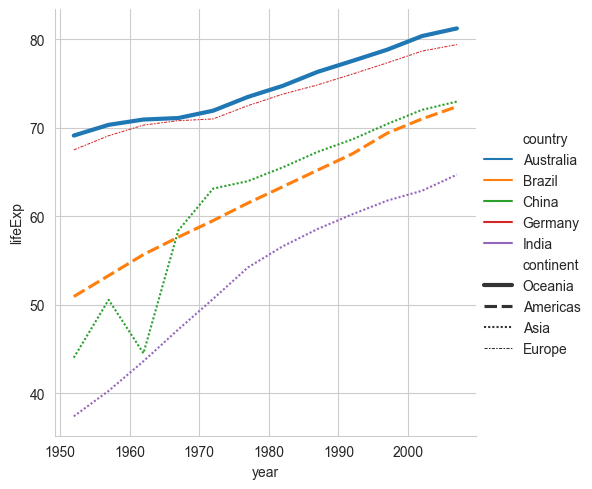

In [10]:
sns.relplot(temp_df, kind='line', x='year', y='lifeExp', hue='country', style='continent', size='continent')

<Axes: xlabel='year', ylabel='lifeExp'>

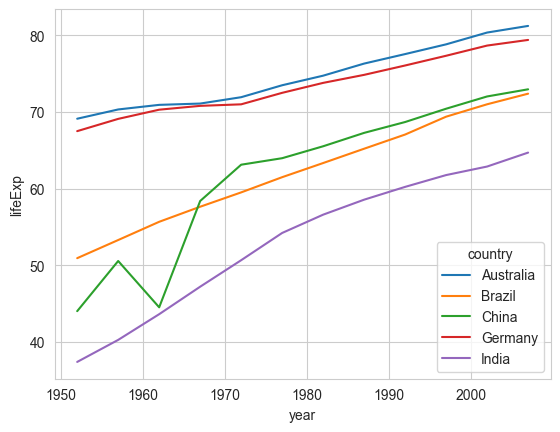

In [11]:
sns.lineplot(temp_df, x='year', y='lifeExp', hue='country')

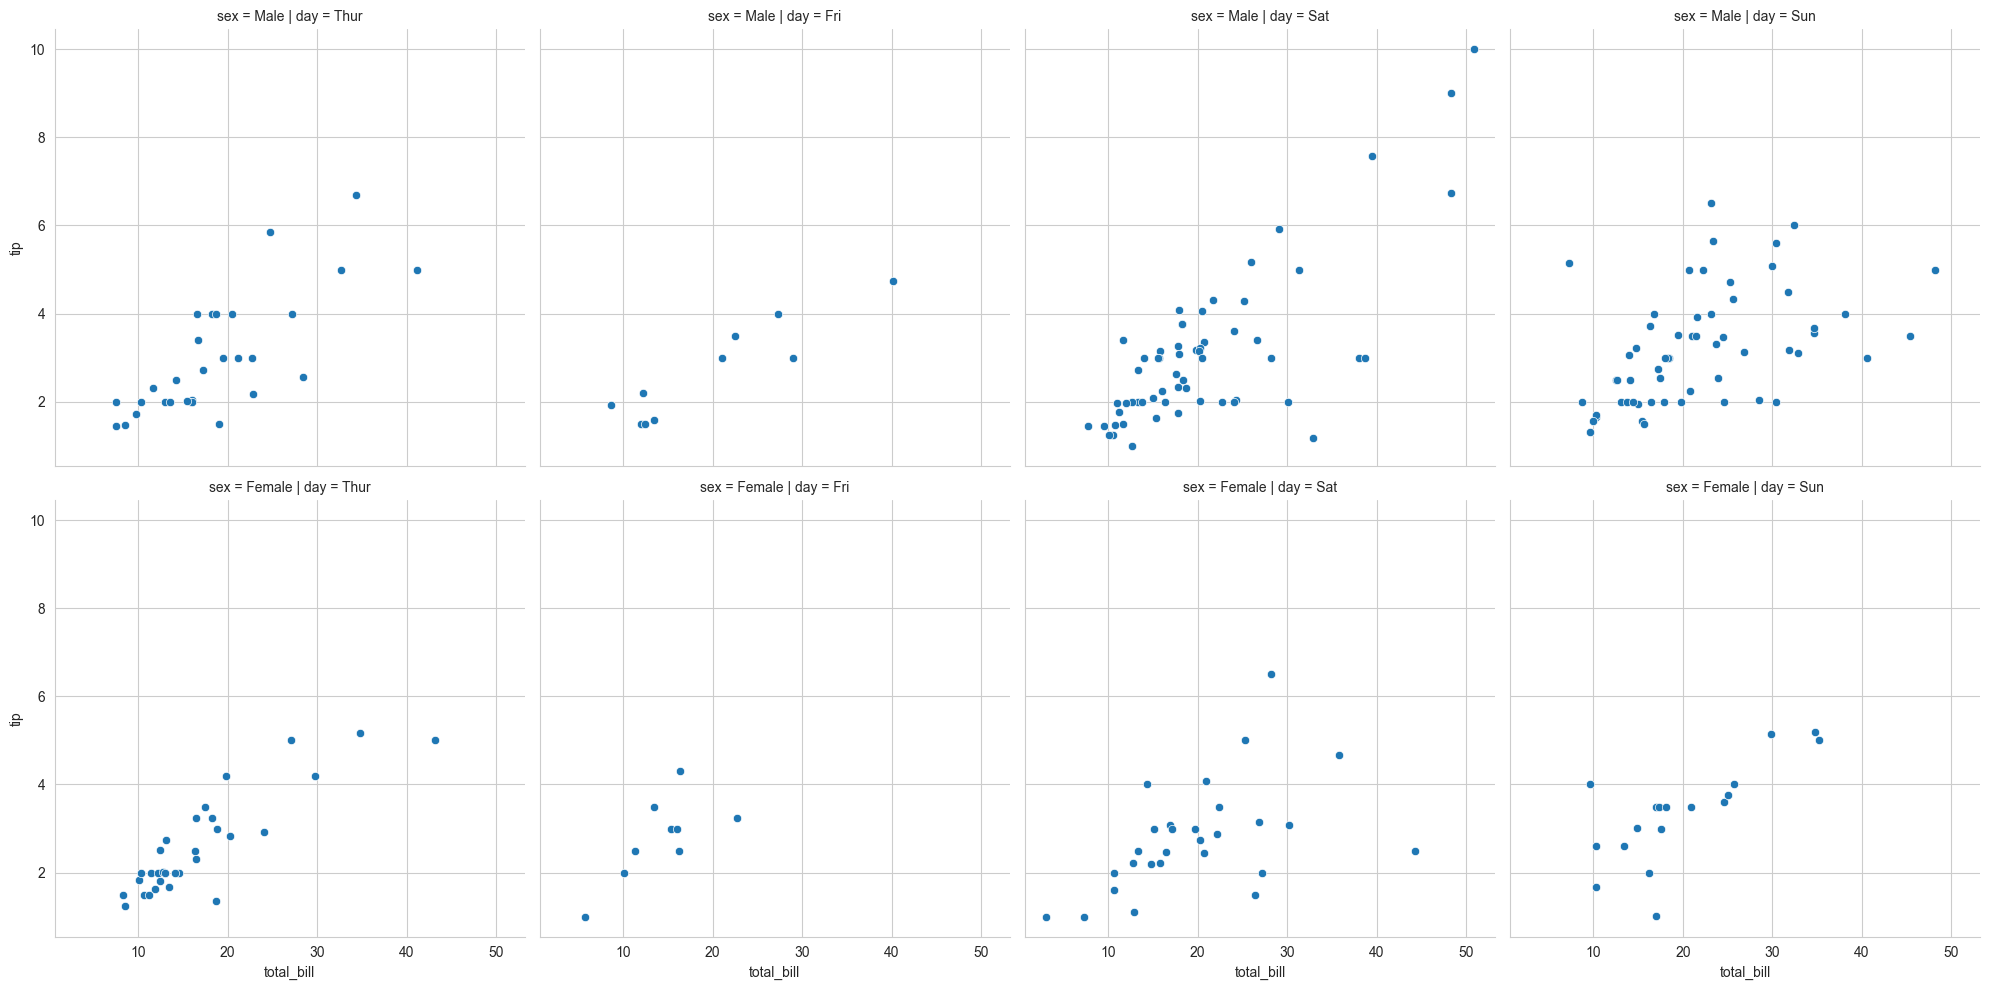

In [12]:
# facet plot -> figure level function -> work ONLY with rel plot
# Does not work with scatterplot and lineplot, which are axes level function
sns.relplot(tips, x='total_bill', y='tip', kind='scatter', row='sex', col='day')

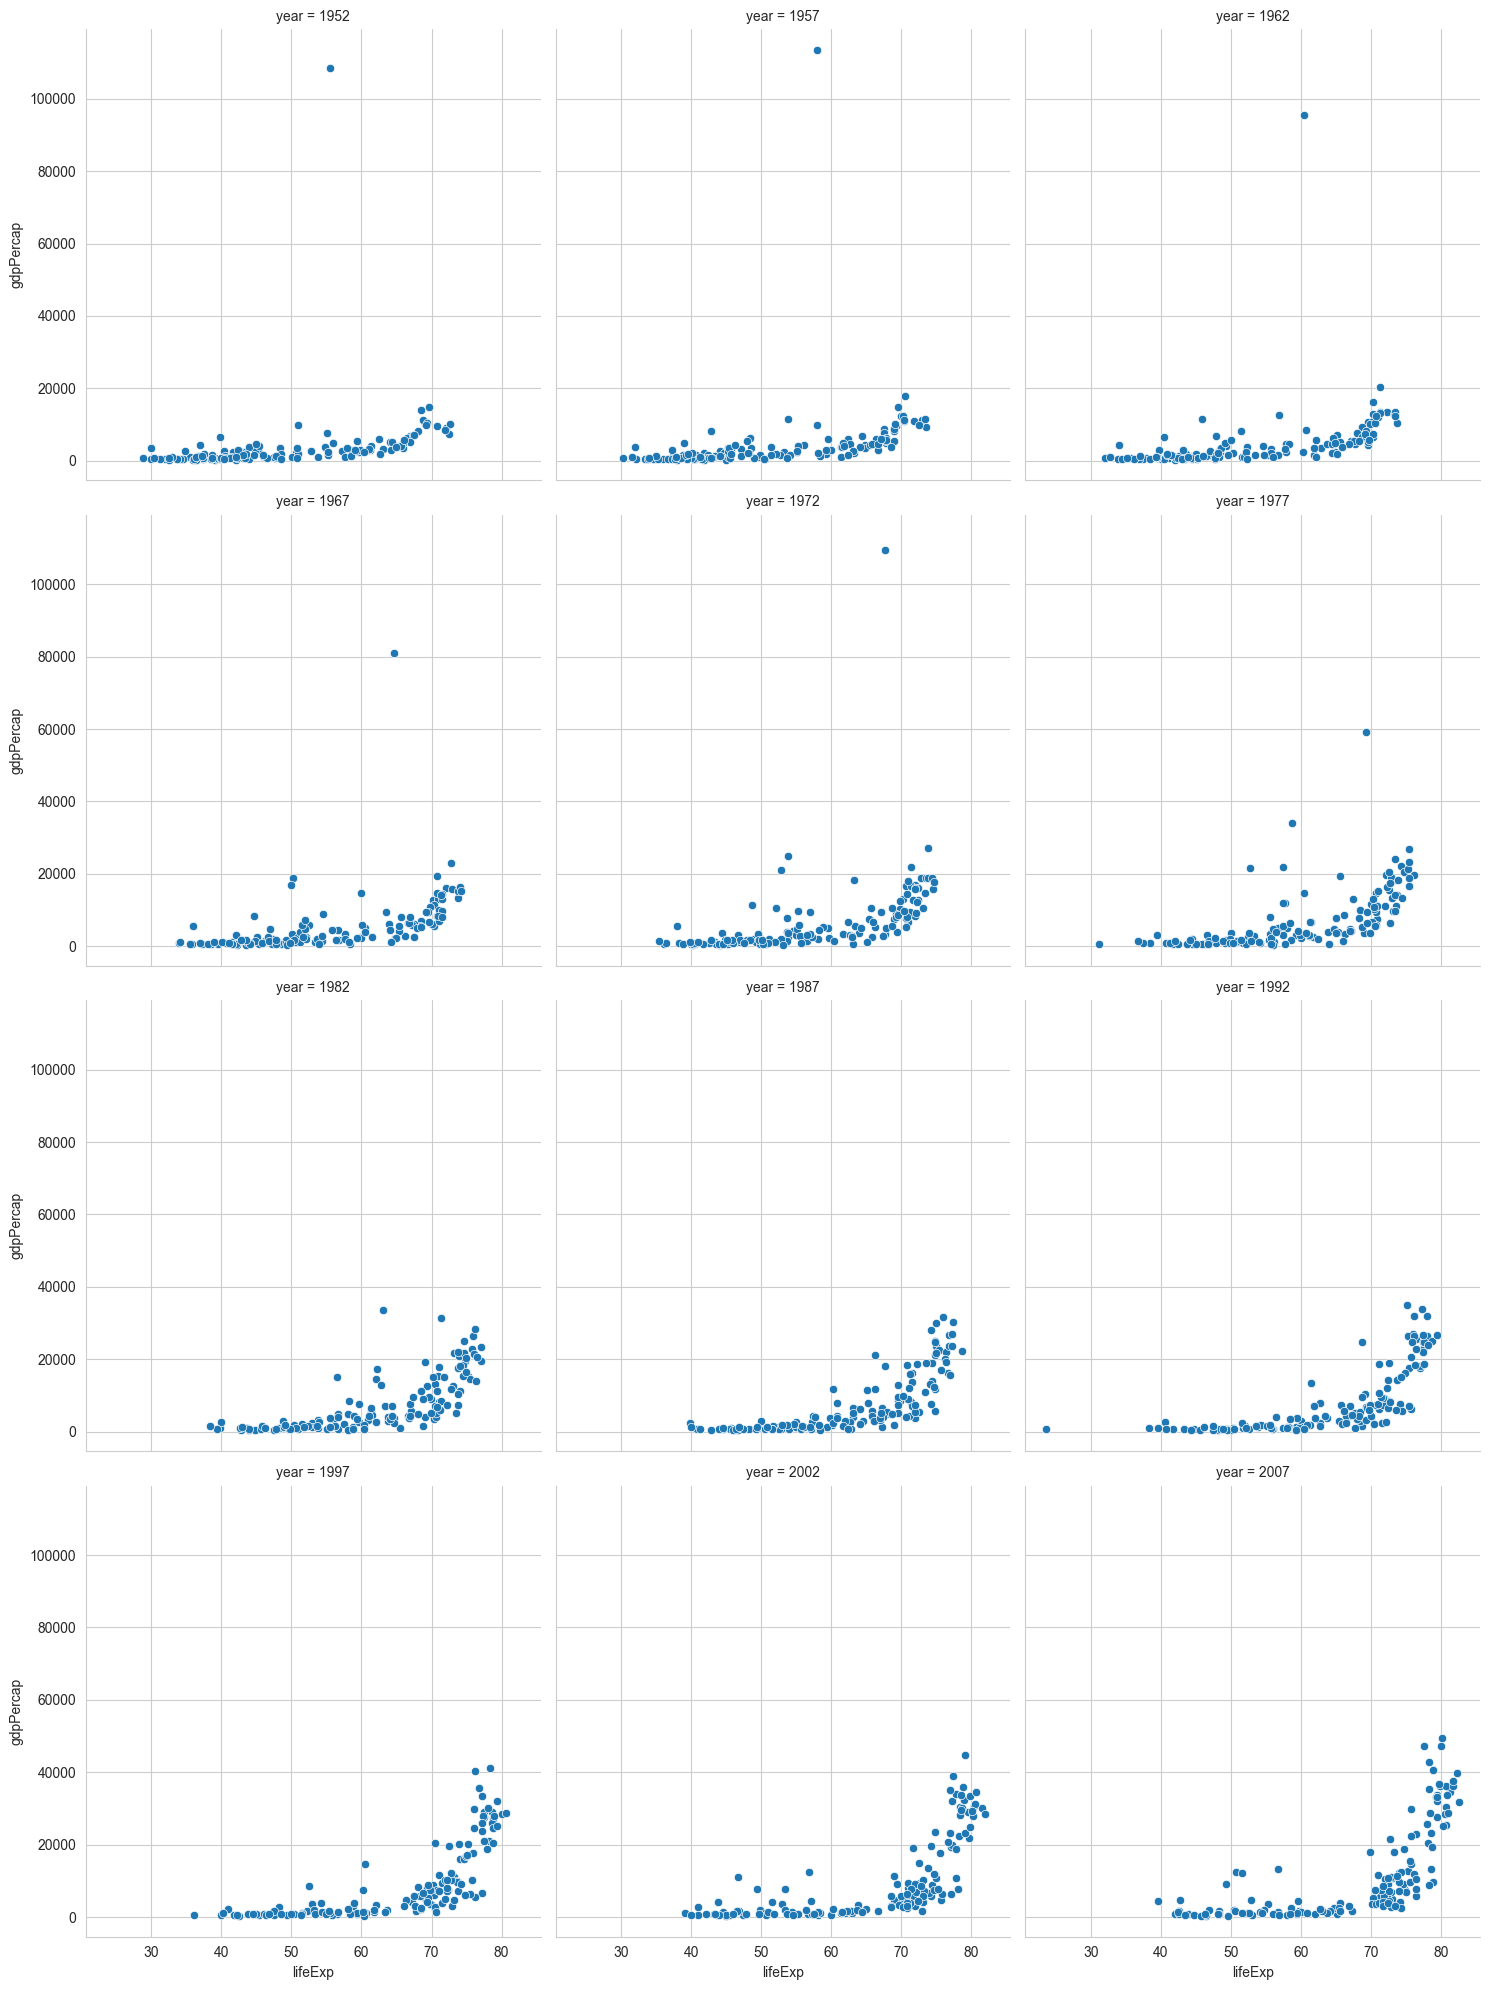

In [13]:
# col wrap
sns.relplot(gap, x='lifeExp', y='gdpPercap', kind='scatter', col_wrap=3, col='year')

## 2. Distribution Plots
- used for uni-variate analysis
- used to find out the distribution
- Range of the observation
- Central Tendency
- is the data bimodal?
- are there any outliers?

Plots under distribution plot
- histplot
- kdeplot
- rugplot

In [14]:
# figure level -> displot
# axes level -> histplot -> kdeplot -> rugplot

<Axes: xlabel='total_bill', ylabel='Count'>

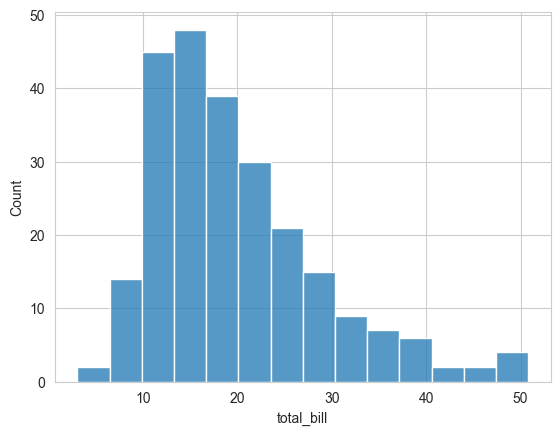

In [15]:
# plotting uni-variate histograms
sns.histplot(tips, x='total_bill')

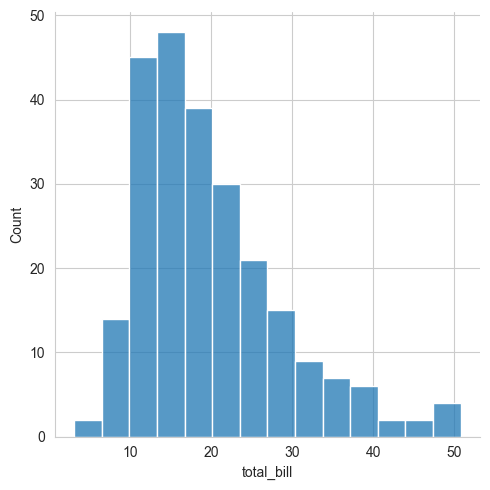

In [16]:
sns.displot(tips, x='total_bill', kind='hist')

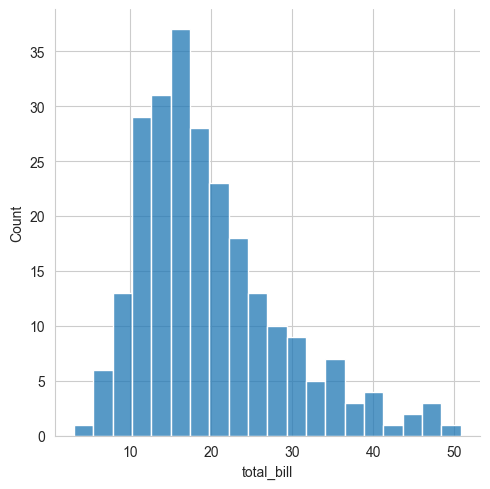

In [17]:
# bins parameter
sns.displot(tips, x='total_bill', kind='hist', bins=20)

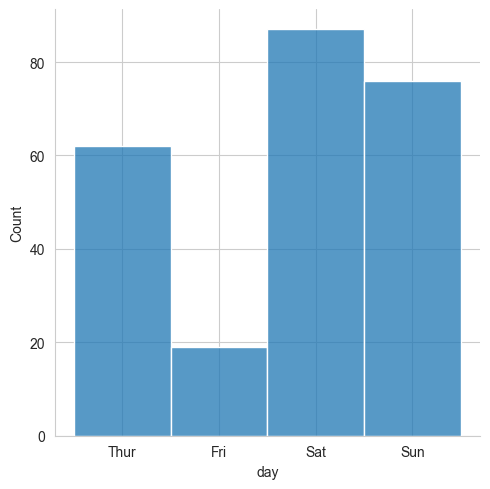

In [18]:
# It's also possible to visualize the distribution of a categorical variable using the logic of a histogram
# Discrete bins are automatically set for categorical variables

# countplot
sns.displot(tips, x='day', kind='hist')

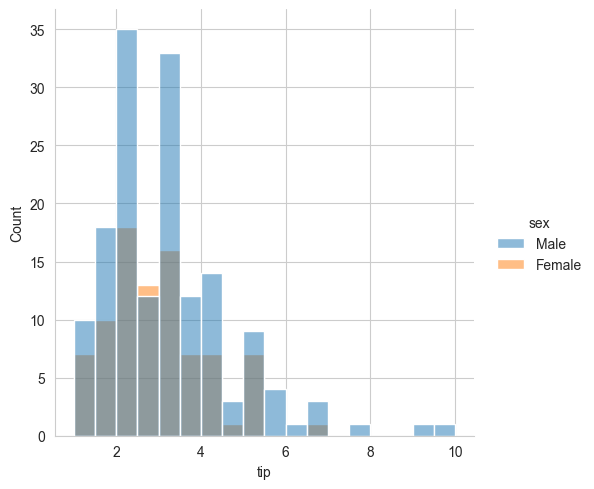

In [19]:
# hue parameter
sns.displot(tips, x='tip', hue='sex', kind='hist')

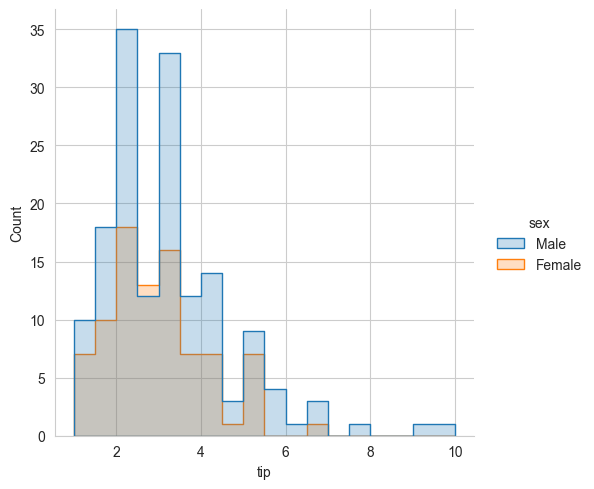

In [20]:
# element -> step
sns.displot(tips, x='tip', hue='sex', kind='hist', element='step')

In [21]:
titanic = sns.load_dataset('titanic')
print(titanic.shape)
titanic.head()

(891, 15)


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


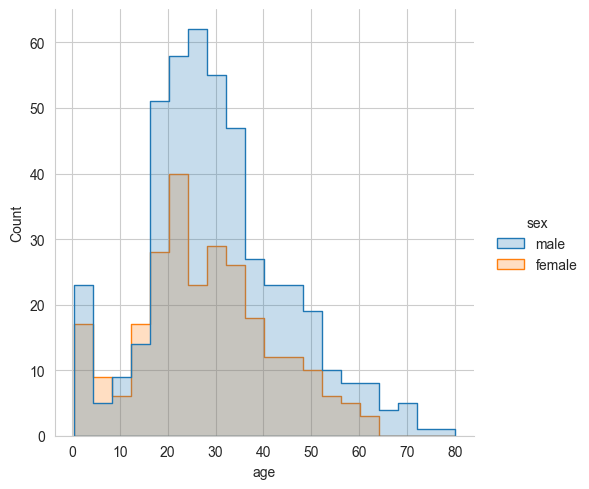

In [22]:
sns.displot(titanic, x='age', kind='hist', element='step', hue='sex')

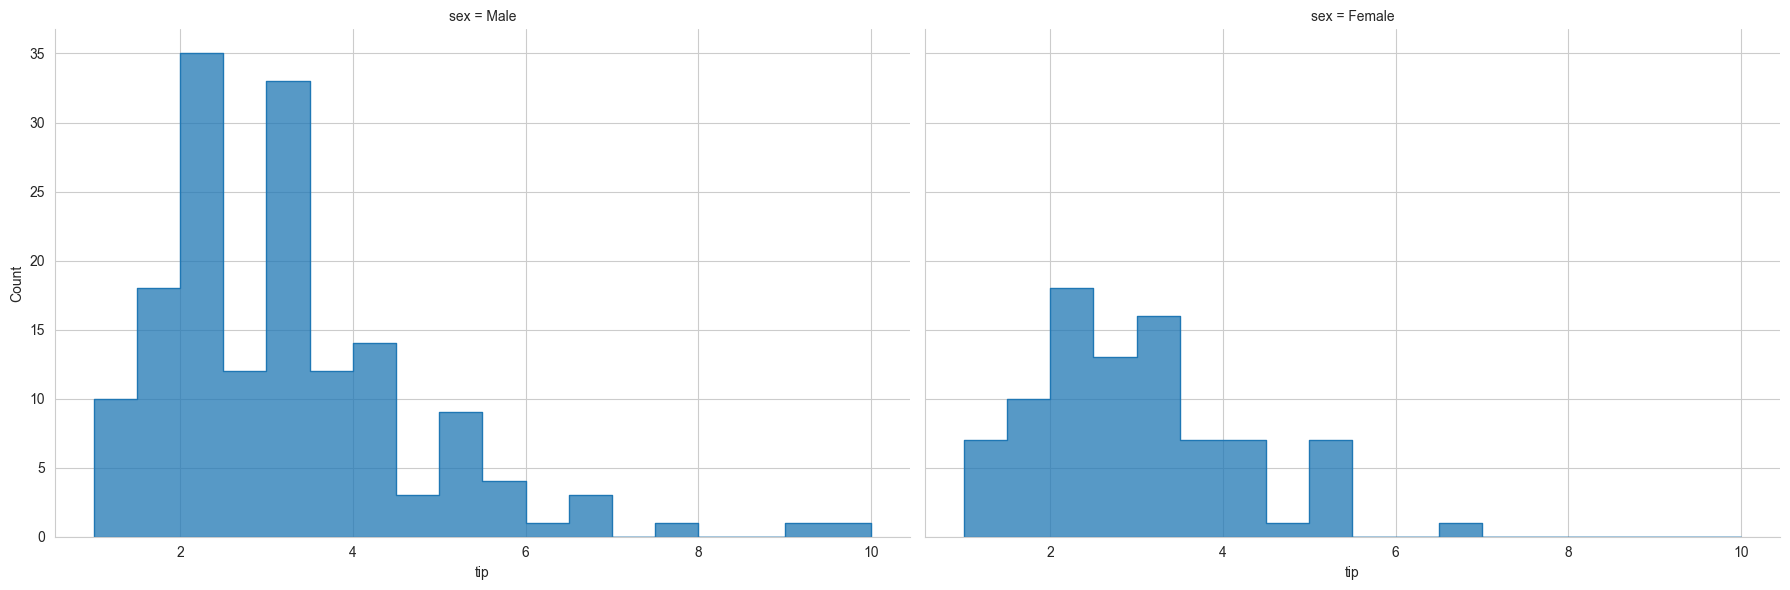

In [57]:
# faceting using col and row
# will not work with histplot function
sns.displot(tips, x='tip', kind='hist', col='sex', element='step', height=6, aspect=1.5)

<Axes: xlabel='total_bill', ylabel='Density'>

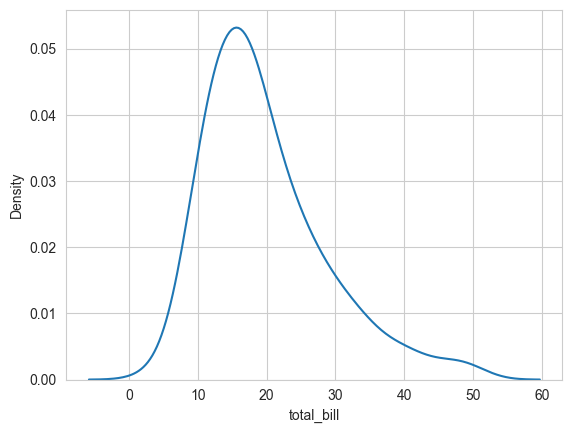

In [24]:
# kdeplot 
# Rather than using discrete bins, a KDE plot smoothes the observation with a Gaussian kernel, producing a continuous density estimate
sns.kdeplot(tips, x='total_bill')

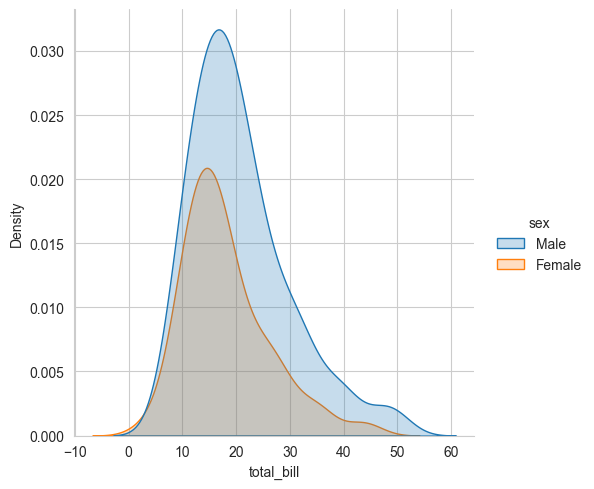

In [25]:
# hue -> fill
sns.displot(tips, x='total_bill', kind='kde', hue='sex', fill=True)

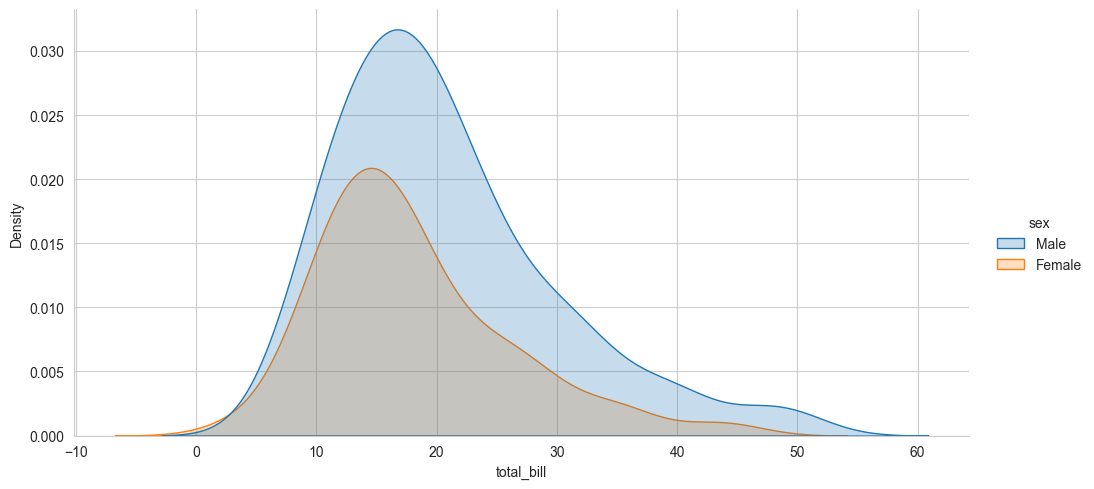

In [51]:
# if we want to increase the size of above fig
sns.displot(tips, x='total_bill', kind='kde', hue='sex', fill=True, height=5, aspect=2)

In [53]:

# sns.displot(tips, x='total_bill', kind='kde', hue='sex', fill=True, height=5, aspect=3)

<Axes: xlabel='total_bill', ylabel='Density'>

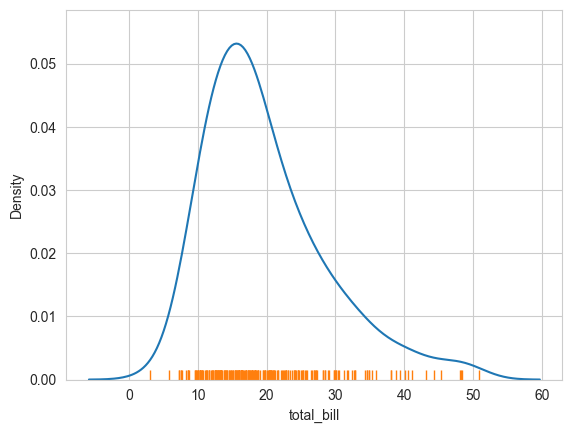

In [26]:
# Rug plot
# Plot marginal distribution by drawing ticks along the x and y axes
# This function is intended to complement other plots by showing the location of individual observations in an unobtrusive way
sns.kdeplot(tips, x='total_bill')
sns.rugplot(tips, x='total_bill')

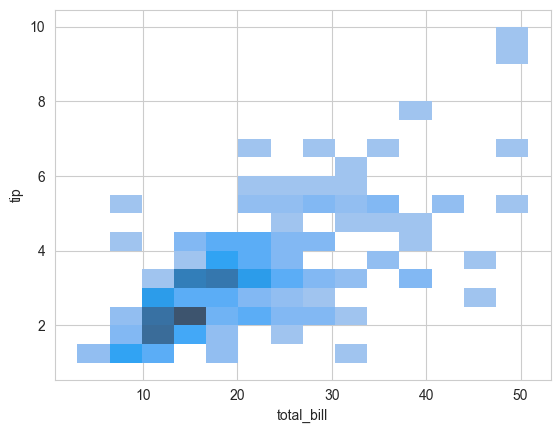

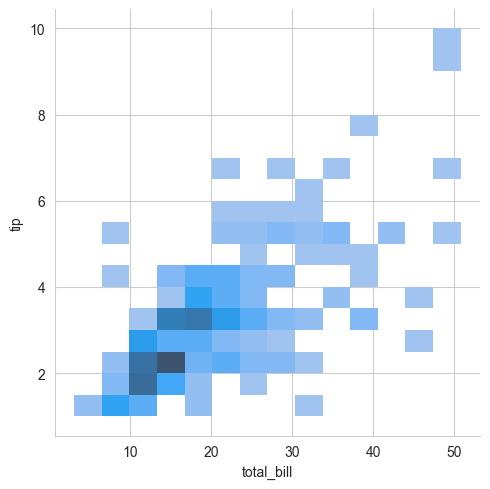

In [27]:
# Bivariate histogram
# A bivariate histogram bins the data within rectangles that tile the plot
# and then shows the count of observations within each rectangle with the fill color
sns.histplot(tips, x='total_bill', y='tip')
sns.displot(tips, x='total_bill', y='tip', kind='hist')

<Axes: xlabel='total_bill', ylabel='tip'>

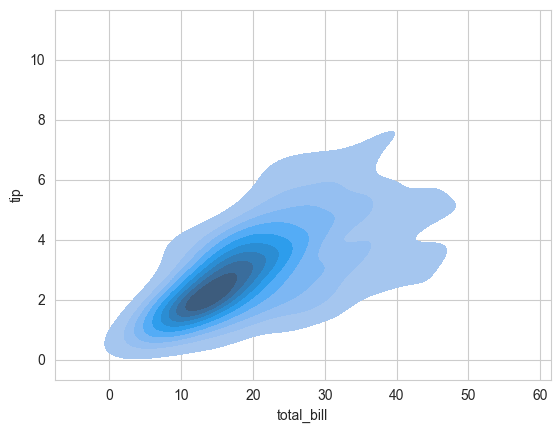

In [28]:
# Bivariate kdeplot
# A bivariate KDE plot smoothes the (x, y) observation with a 2D Gaussian
sns.kdeplot(tips, x='total_bill', y='tip', fill=True)

## 3. Matrix Plot
- Heatmap
- Clustermap

In [36]:
# Heatmap
# plot rectangular data as a color-encoded matrix
temp_df = gap.pivot(index='country', columns='year', values='lifeExp')
temp_df.head()

year,1952,1957,1962,1967,1972,1977,1982,1987,1992,1997,2002,2007
country,,,,,,,,,,,,
Afghanistan,28.801,30.332,31.997,34.020,36.088,38.438,39.854,40.822,41.674,41.763,42.129,43.828
Albania,55.230,59.280,64.820,66.220,67.690,68.930,70.420,72.000,71.581,72.950,75.651,76.423
Algeria,43.077,45.685,48.303,51.407,54.518,58.014,61.368,65.799,67.744,69.152,70.994,72.301
Angola,30.015,31.999,34.000,35.985,37.928,39.483,39.942,39.906,40.647,40.963,41.003,42.731
Argentina,62.485,64.399,65.142,65.634,67.065,68.481,69.942,70.774,71.868,73.275,74.340,75.320


<Axes: xlabel='year', ylabel='country'>

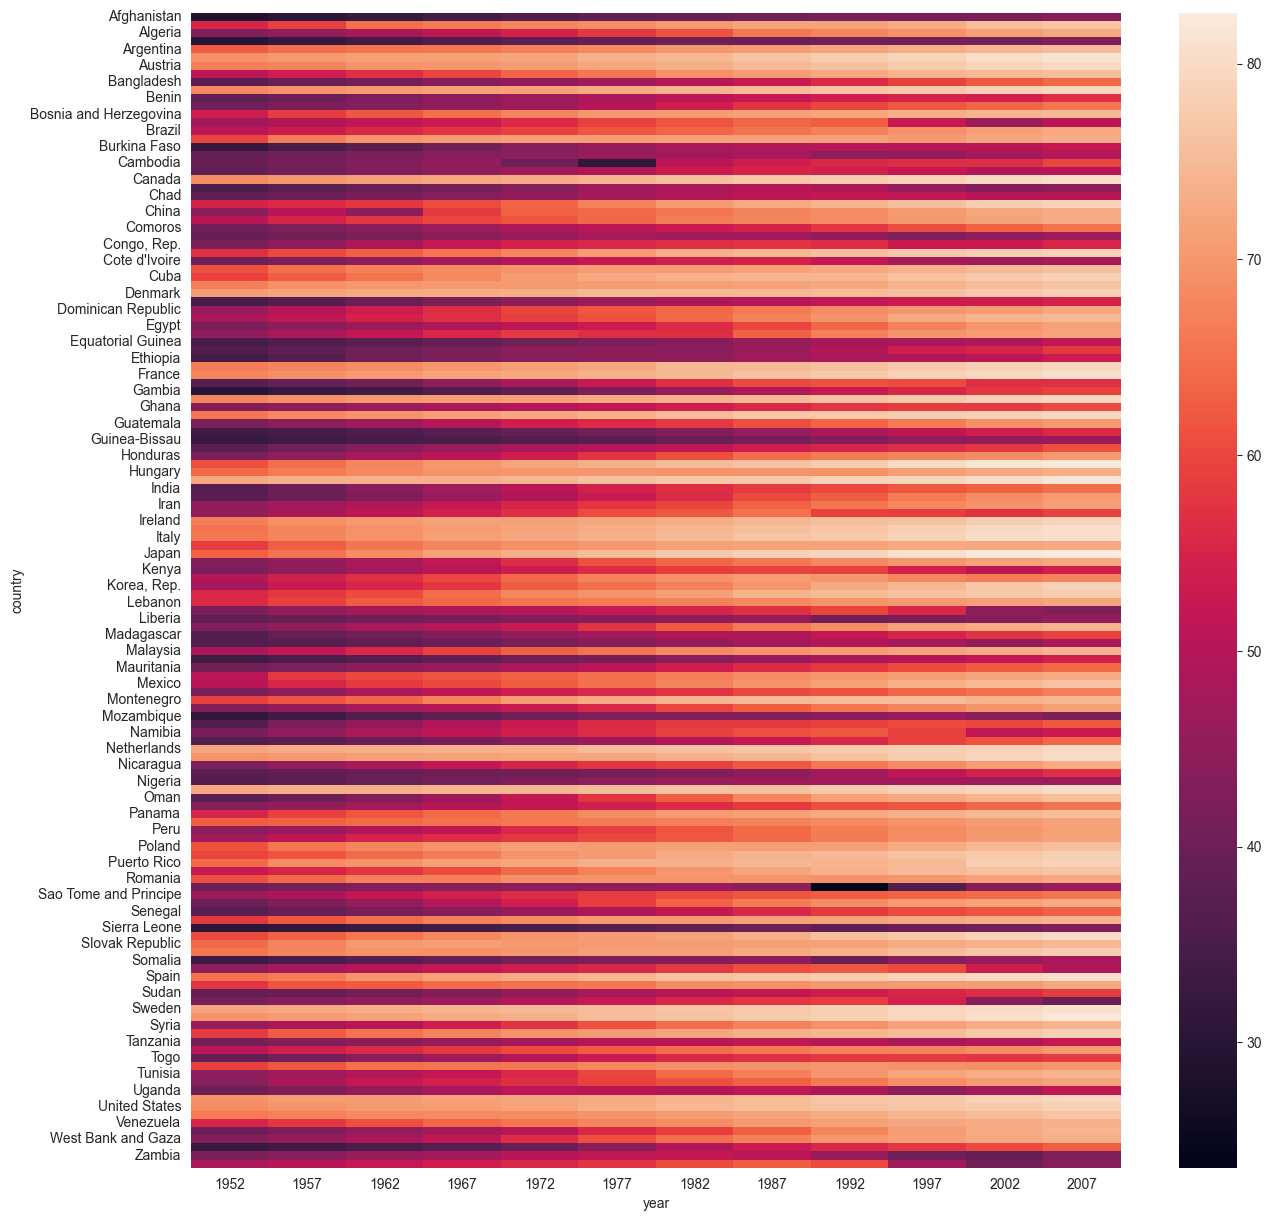

In [39]:
# axes level function
plt.figure(figsize=(15, 15))
sns.heatmap(temp_df)

In [41]:
# annot
temp_df = gap.query('continent == "Europe"').pivot(index='country', columns='year', values='lifeExp')
temp_df.head()

year,1952,1957,1962,1967,1972,1977,1982,1987,1992,1997,2002,2007
country,,,,,,,,,,,,
Albania,55.23,59.28,64.82,66.22,67.69,68.93,70.42,72.00,71.581,72.950,75.651,76.423
Austria,66.80,67.48,69.54,70.14,70.63,72.17,73.18,74.94,76.040,77.510,78.980,79.829
Belgium,68.00,69.24,70.25,70.94,71.44,72.80,73.93,75.35,76.460,77.530,78.320,79.441
Bosnia and Herzegovina,53.82,58.45,61.93,64.79,67.45,69.86,70.69,71.14,72.178,73.244,74.090,74.852
Bulgaria,59.60,66.61,69.51,70.42,70.90,70.81,71.08,71.34,71.190,70.320,72.140,73.005


<Axes: xlabel='year', ylabel='country'>

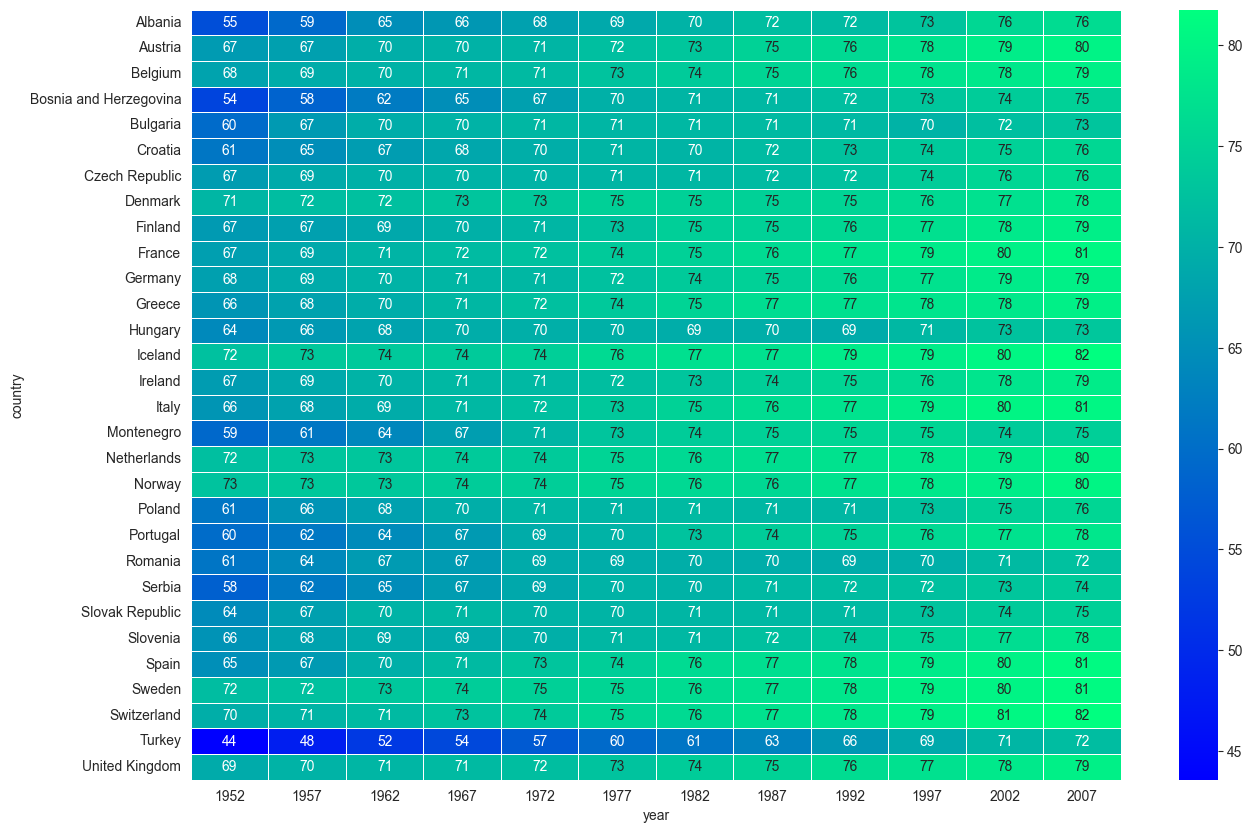

In [45]:
# linewidth, cmap and annot
plt.figure(figsize=(15, 10))
sns.heatmap(temp_df, annot=True, linewidths=0.5, cmap='winter')

In [46]:
# clustermap
# Plot a matrix dataset as a hierarchically-clustered heatmap
# This function required scipy to be available
iris = px.data.iris()
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species,species_id
0,5.1,3.5,1.4,0.2,setosa,1
1,4.9,3.0,1.4,0.2,setosa,1
2,4.7,3.2,1.3,0.2,setosa,1
3,4.6,3.1,1.5,0.2,setosa,1
4,5.0,3.6,1.4,0.2,setosa,1


In [48]:
iris.species.value_counts()

species
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64

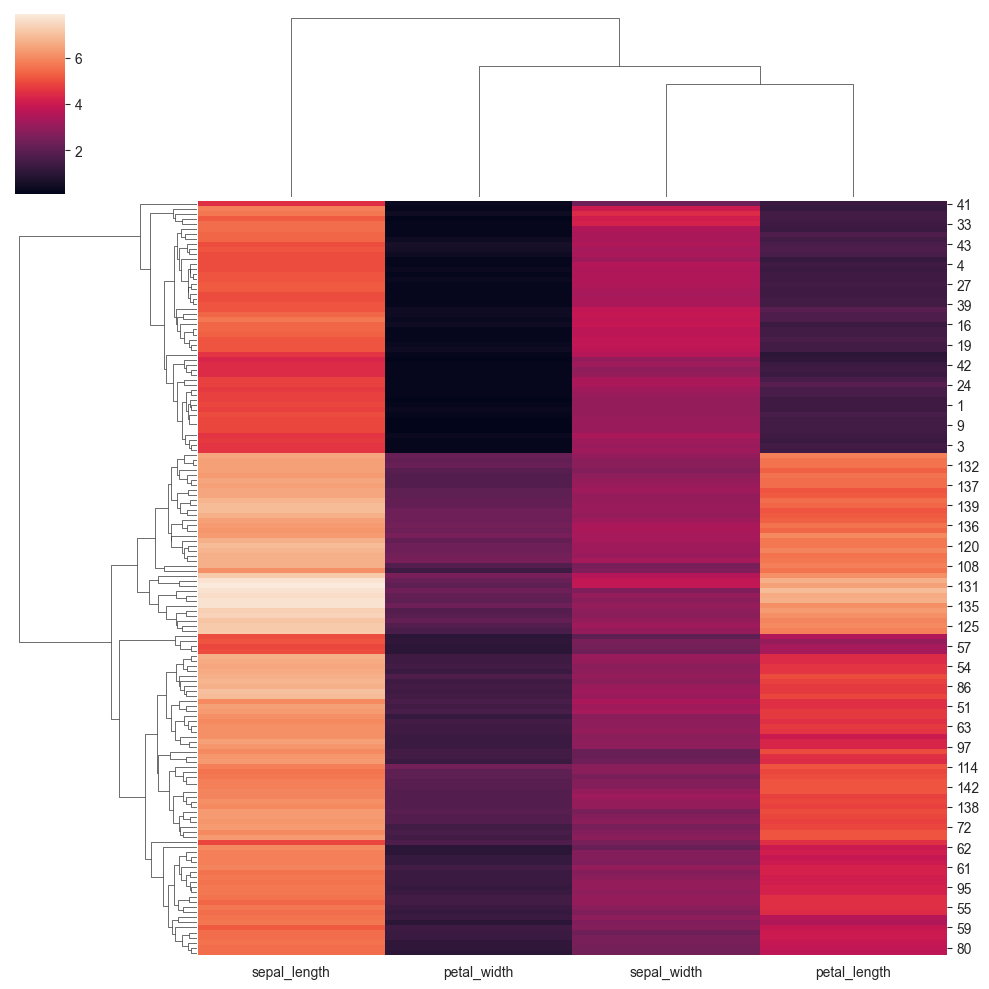

In [49]:
# dendogram
sns.clustermap(iris.iloc[:,[0, 1, 2, 3]])